### Exploring Relationships

Notebook contains:
1. Correlations
2. Scatterplots
3. Pair Plots
4. Categorical Plots

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.2.2'

In [3]:
%matplotlib inline

In [4]:
#path for this project
path = 'C:/Users/kirat/Documents/Career Foundry/Personal Project'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','data_foruse.csv'))

In [6]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,NUMBRANCH,PREDDEG,HIGHDEG,CCSIZSET,...,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,ICLEVEL,AGE_ENTRY,GRAD_DEBT_MDN,AVGFACSAL,PFTFAC,CURROPER
0,100654,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,1,3,4,14.0,...,18.0,17.0,17.0,NaN,1,NaN,33375,7101.0,0.7411,1
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,1,3,4,15.0,...,25.0,27.0,23.0,NaN,1,NaN,22500,10717.0,0.7766,1
2,100690,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,1,3,4,6.0,...,NaN,NaN,NaN,NaN,1,NaN,27334,4292.0,1.0000,1
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,1,3,4,12.0,...,28.0,30.0,27.0,NaN,1,NaN,21607,9442.0,0.6544,1
4,100724,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,1,3,4,14.0,...,18.0,17.0,17.0,NaN,1,NaN,32000,7754.0,0.5826,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         6806 non-null   int64  
 1   INSTNM         6806 non-null   object 
 2   CITY           6806 non-null   object 
 3   STABBR         6806 non-null   object 
 4   ZIP            6806 non-null   object 
 5   ACCREDAGENCY   6452 non-null   object 
 6   NUMBRANCH      6806 non-null   int64  
 7   PREDDEG        6806 non-null   int64  
 8   HIGHDEG        6806 non-null   int64  
 9   CCSIZSET       6331 non-null   float64
 10  ADM_RATE       2006 non-null   float64
 11  LOCALE         6331 non-null   float64
 12  SATVRMID       1239 non-null   float64
 13  SATMTMID       1242 non-null   float64
 14  SATWRMID       0 non-null      float64
 15  ACTCMMID       1273 non-null   float64
 16  ACTENMID       1199 non-null   float64
 17  ACTMTMID       1199 non-null   float64
 18  ACTWRMID

In [8]:
#columns are selected for correlation analysis  

df_corr = df[['UNITID','ADM_RATE','SATMTMID','ACTMTMID','ACTCMMID','GRAD_DEBT_MDN','AVGFACSAL','NUMBRANCH','LOCALE',
              'CURROPER','PFTFAC','HIGHDEG']]

In [9]:
df_corr.head()

,UNITID,ADM_RATE,SATMTMID,ACTMTMID,ACTCMMID,GRAD_DEBT_MDN,AVGFACSAL,NUMBRANCH,LOCALE,CURROPER,PFTFAC,HIGHDEG
0,100654,0.8986,465.0,17.0,18.0,33375,7101.0,1,12.0,1,0.7411,4
1,100663,0.9211,555.0,23.0,25.0,22500,10717.0,1,12.0,1,0.7766,4
2,100690,NaN,NaN,NaN,NaN,27334,4292.0,1,12.0,1,1.0000,4
3,100706,0.8087,565.0,27.0,28.0,21607,9442.0,1,12.0,1,0.6544,4
4,100724,0.9774,465.0,17.0,18.0,32000,7754.0,1,12.0,1,0.5826,4


In [10]:
#debt after graduation column is taken out to be studied separetely
#a subset of the original dataframe is used for this analysis

df_corr['GRAD_DEBT_MDN']

0       33375
1       22500
2       27334
3       21607
4       32000
        ...  
6801     9371
6802     9371
6803    12125
6804    21000
6805      NaN
Name: GRAD_DEBT_MDN, Length: 6806, dtype: object

In [11]:
df_debt=df_corr[df_corr['GRAD_DEBT_MDN'] != 'PrivacySuppressed']

In [12]:
df_debt['GRAD_DEBT_MDN'].apply(pd.to_numeric)

0       33375.0
1       22500.0
2       27334.0
3       21607.0
4       32000.0
         ...   
6801     9371.0
6802     9371.0
6803    12125.0
6804    21000.0
6805        NaN
Name: GRAD_DEBT_MDN, Length: 5428, dtype: float64

In [13]:
df_debt.GRAD_DEBT_MDN = df_debt.GRAD_DEBT_MDN.astype(float)

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5428 entries, 0 to 6805
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         5428 non-null   int64  
 1   ADM_RATE       1832 non-null   float64
 2   SATMTMID       1232 non-null   float64
 3   ACTMTMID       1185 non-null   float64
 4   ACTCMMID       1259 non-null   float64
 5   GRAD_DEBT_MDN  5307 non-null   float64
 6   AVGFACSAL      3407 non-null   float64
 7   NUMBRANCH      5428 non-null   int64  
 8   LOCALE         4999 non-null   float64
 9   CURROPER       5428 non-null   int64  
 10  PFTFAC         3169 non-null   float64
 11  HIGHDEG        5428 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 551.3 KB


In [15]:
#correlation for the dataframe

df_corr.corr()

,UNITID,ADM_RATE,SATMTMID,ACTMTMID,ACTCMMID,AVGFACSAL,NUMBRANCH,LOCALE,CURROPER,PFTFAC,HIGHDEG
UNITID,1.000000,0.094455,-0.012758,-0.039463,-0.033045,-0.295797,0.505235,-0.127843,-0.067991,-0.115315,-0.400114
ADM_RATE,0.094455,1.000000,-0.459191,-0.413960,-0.442260,-0.341313,0.089028,0.022448,-0.000095,-0.078754,-0.048984
SATMTMID,-0.012758,-0.459191,1.000000,0.936574,0.941621,0.743228,0.005634,-0.225450,0.073389,0.178570,0.096091
ACTMTMID,-0.039463,-0.413960,0.936574,1.000000,0.965782,0.721295,0.052508,-0.196802,0.083350,0.178360,0.111847
ACTCMMID,-0.033045,-0.442260,0.941621,0.965782,1.000000,0.715998,0.004702,-0.195551,0.091335,0.184567,0.101229
AVGFACSAL,-0.295797,-0.341313,0.743228,0.721295,0.715998,1.000000,-0.054173,-0.125825,0.117123,0.118702,0.319278
NUMBRANCH,0.505235,0.089028,0.005634,0.052508,0.004702,-0.054173,1.000000,-0.080678,-0.074268,-0.169997,-0.185409
LOCALE,-0.127843,0.022448,-0.225450,-0.196802,-0.195551,-0.125825,-0.080678,1.000000,0.047074,0.060096,-0.036562
CURROPER,-0.067991,-0.000095,0.073389,0.083350,0.091335,0.117123,-0.074268,0.047074,1.000000,-0.001623,0.110923
PFTFAC,-0.115315,-0.078754,0.178570,0.178360,0.184567,0.118702,-0.169997,0.060096,-0.001623,1.000000,0.173127


In [16]:
df_corr.shape

(6806, 12)

In [17]:
#correlation for the subset

df_debt.corr()

,UNITID,ADM_RATE,SATMTMID,ACTMTMID,ACTCMMID,GRAD_DEBT_MDN,AVGFACSAL,NUMBRANCH,LOCALE,CURROPER,PFTFAC,HIGHDEG
UNITID,1.000000,0.091872,-0.014212,-0.037486,-0.033587,0.165871,-0.292321,0.526326,-0.150677,-0.057737,-0.131800,-0.435110
ADM_RATE,0.091872,1.000000,-0.456320,-0.414949,-0.442045,0.097141,-0.329286,0.102128,0.038412,-0.001992,-0.102387,0.004142
SATMTMID,-0.014212,-0.456320,1.000000,0.940194,0.942606,-0.286997,0.742458,0.005472,-0.223904,0.074314,0.186823,0.089524
ACTMTMID,-0.037486,-0.414949,0.940194,1.000000,0.966085,-0.232191,0.724926,0.052365,-0.200763,0.084800,0.180000,0.104552
ACTCMMID,-0.033587,-0.442045,0.942606,0.966085,1.000000,-0.262451,0.716980,0.003880,-0.194876,0.092735,0.188132,0.090635
GRAD_DEBT_MDN,0.165871,0.097141,-0.286997,-0.232191,-0.262451,1.000000,0.170403,0.352131,-0.010652,-0.012620,0.091323,0.524080
AVGFACSAL,-0.292321,-0.329286,0.742458,0.724926,0.716980,0.170403,1.000000,-0.077258,-0.124974,0.134605,0.143781,0.354434
NUMBRANCH,0.526326,0.102128,0.005472,0.052365,0.003880,0.352131,-0.077258,1.000000,-0.082935,-0.086309,-0.186411,-0.215605
LOCALE,-0.150677,0.038412,-0.223904,-0.200763,-0.194876,-0.010652,-0.124974,-0.082935,1.000000,0.051914,0.084748,0.017569
CURROPER,-0.057737,-0.001992,0.074314,0.084800,0.092735,-0.012620,0.134605,-0.086309,0.051914,1.000000,0.000533,0.101657


In [18]:
df_debt.shape

(5428, 12)

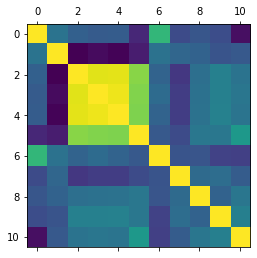

In [19]:
#correlation heatmap of the dataframe using matplotlib

plt.matshow(df_corr.corr())
plt.show()

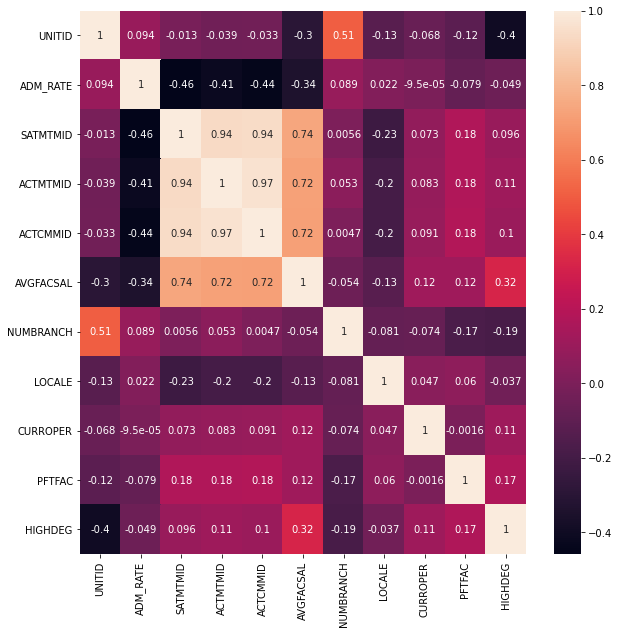

In [20]:
#correlation heatmap of the dataframe using seaborn

f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_corr.corr(), annot = True) 

#### Correlation heatmap reveals the following information:
1. There is a very strong positive correlation between SAT scores and ACT scores. 
This would suggest that it's not necessary to study the results of both of the tests.
For simplicity, only SAT Math score will be used for further analysis.

2. There is a strong positive correlation between test scores and Average Faculty Salary.
Colleges with higher SAT test scores suggest higher salaries for the faculty.

3. There is a negative correlation between test scores and admission rates.
As the test scores go up, the admission rates go down. Those are the college that are hard to get into.

4. There is some positive correlation between Average Faculty Salary and High Degree awarded colleges.
Colleges that have higher degree posibility, have higher average faculty salary.

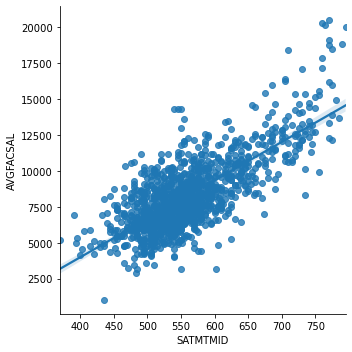

In [21]:
#line plot to illustrate SAT math scores vs average faculty salary

fig1 = sns.lmplot(x = 'SATMTMID', y = 'AVGFACSAL', data = df_corr)

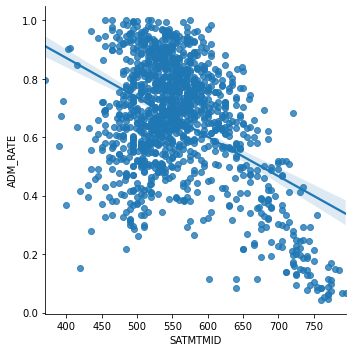

In [22]:
#line plot to illustrate SAT math scores vs admission rate

fig2 = sns.lmplot(x = 'SATMTMID', y = 'ADM_RATE', data = df_corr)

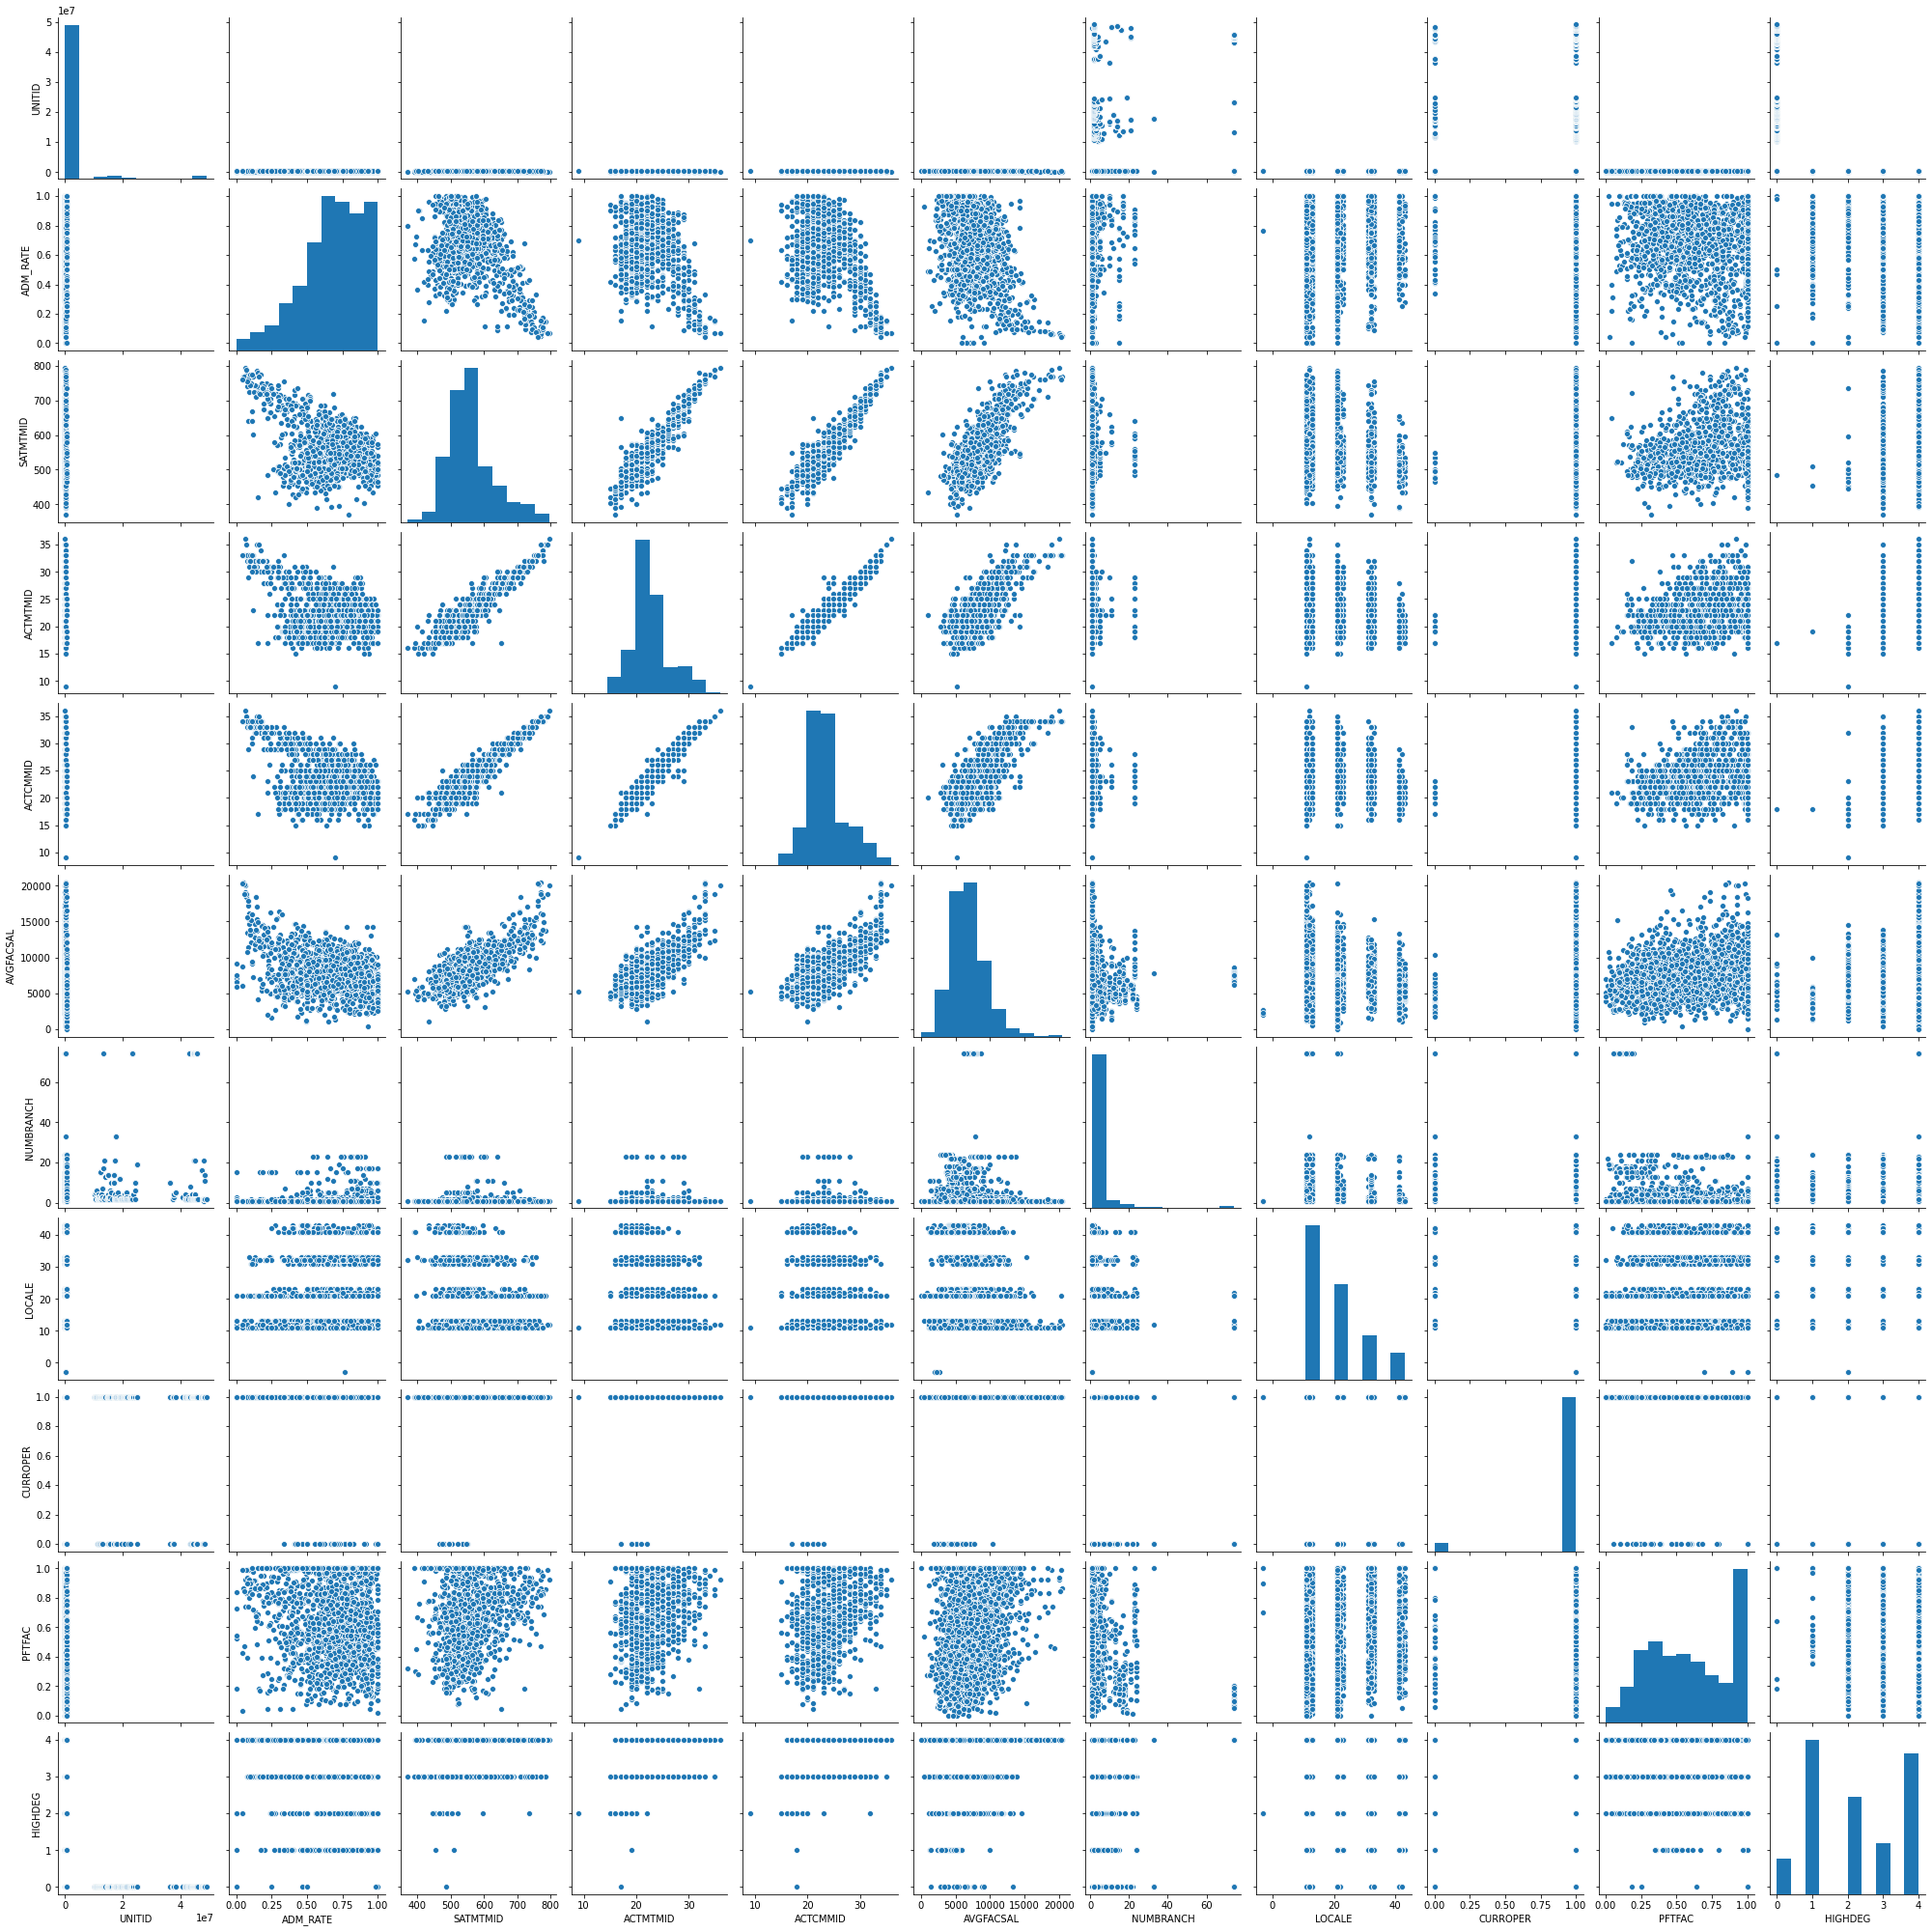

In [23]:
#pairplot for the dataframe
#illustrating the same information as the correlation heatmap

pairplot = sns.pairplot(df_corr)

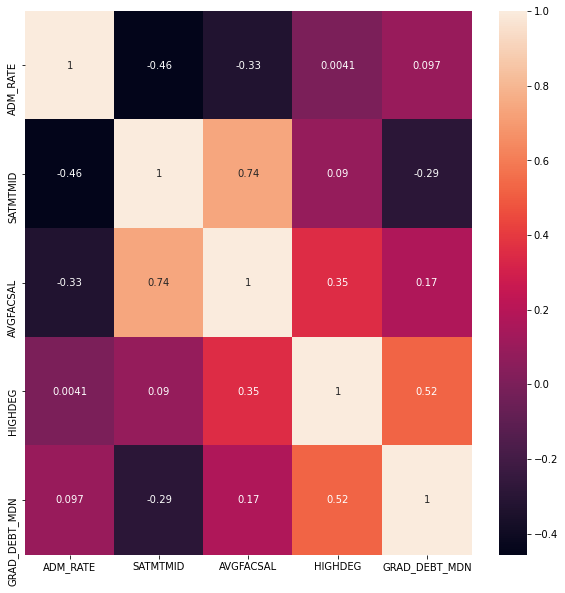

In [24]:
#correlation heatmap of the subset using seaborn

f,ax = plt.subplots(figsize=(10,10))
corr2 = sns.heatmap(df_debt[['ADM_RATE','SATMTMID','AVGFACSAL','HIGHDEG','GRAD_DEBT_MDN']].corr(), annot = True) 

#### Correlation heatmap of the subset reveals aditional information:
There is a positive correlation between colleges with higher degree awarded and debt after graduation.
Student who graduate from colleges that offer higher degree are left with a higher debt.
This might be explained by higher degrees need more years in school and therefore higher debt.

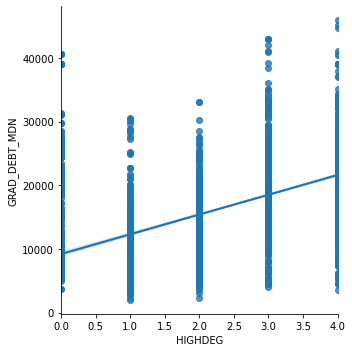

In [25]:
#line plot to illustrate degree awarded vs debt after graduation

fig3 = sns.lmplot(x = 'HIGHDEG', y = 'GRAD_DEBT_MDN', data = df_debt)

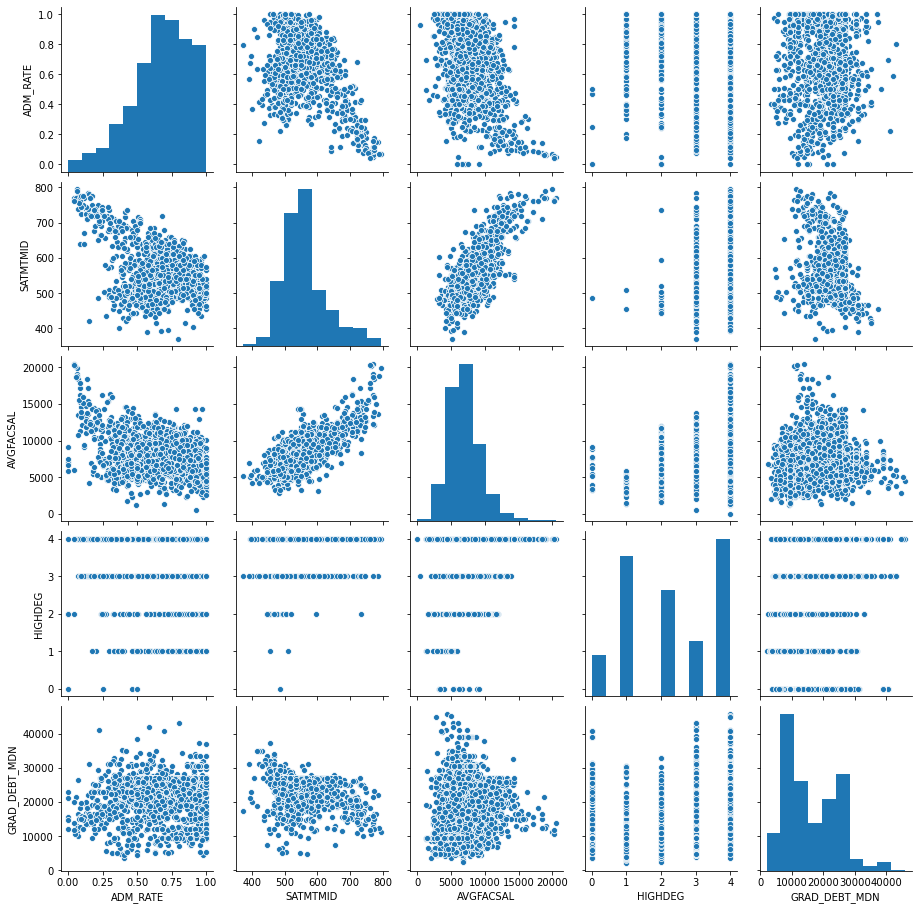

In [26]:
#pairplot for the subset
#illustrating the same information as the correlation heatmap

pairplot2 = sns.pairplot(df_debt[['ADM_RATE','SATMTMID','AVGFACSAL','HIGHDEG','GRAD_DEBT_MDN']])

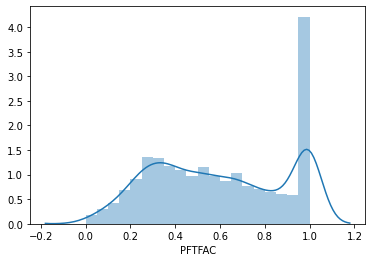

In [27]:
#histogram of the proportion of full-time faculty
#the graph reveals that a lot of colleges have close 100% of the faculty as full-time

fig4 = sns.distplot(df_corr['PFTFAC'], bins = 20)

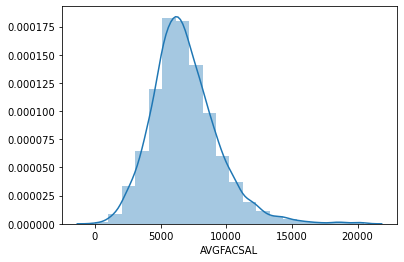

In [28]:
#histogram of the average faculty salary
#the graph reveals a normal distribution, so properties of normal distribution will be applied

fig5 = sns.distplot(df_corr['AVGFACSAL'], bins = 20)

In [29]:
#descriptive statistics for the average faculty salary

df_corr.AVGFACSAL.describe()

count     4012.000000
mean      6858.799103
std       2534.714614
min          0.000000
25%       5200.750000
50%       6574.000000
75%       8198.500000
max      20484.000000
Name: AVGFACSAL, dtype: float64

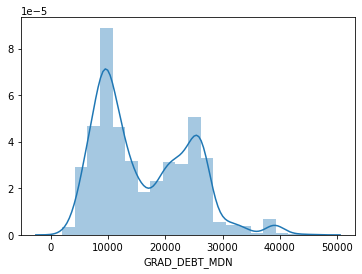

In [30]:
#histogram of the debt after graduation
#the graph appears to be bimodal, quartiles will be used to construct relationships

fig6 = sns.distplot(df_debt['GRAD_DEBT_MDN'],bins=20)

In [31]:
#descriptive statistics for the debt after graduation


df_debt.GRAD_DEBT_MDN.describe()

count     5307.000000
mean     16255.580366
std       8111.954400
min       2020.000000
25%       9500.000000
50%      13700.000000
75%      23250.000000
max      45881.000000
Name: GRAD_DEBT_MDN, dtype: float64

In [32]:
#flag is created for Debt Category, using quartiles

df_debt.loc[df_debt['GRAD_DEBT_MDN'] < 9500, 'Debt Category'] = 'Small debt Q1'

C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kirat\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df_debt.loc[(df_debt['GRAD_DEBT_MDN'] >= 9500)&(df_debt['GRAD_DEBT_MDN'] < 13700), 'Debt Category'] = 'Small debt Q2'

In [34]:
df_debt.loc[(df_debt['GRAD_DEBT_MDN'] >= 13700)&(df_debt['GRAD_DEBT_MDN'] < 23250), 'Debt Category'] = 'Large debt Q3'

In [35]:
df_debt.loc[df_debt['GRAD_DEBT_MDN'] >= 23250, 'Debt Category'] = 'Large debt Q4'

In [36]:
#flag is created for average faculty salary, using mean +/- 1 standard deviation 

df_corr.loc[df_corr['AVGFACSAL'] < (6858.8-2534.71), 'Salary Category'] = 'Low range'

In [37]:
df_corr.loc[(df_corr['AVGFACSAL'] >= (6858.8-2534.71))&(df_corr['AVGFACSAL'] < (6858.8+2534.71)), 'Salary Category'] = 'Mid range'

In [38]:
df_corr.loc[df_corr['AVGFACSAL'] >= (6858.8+2534.71), 'Salary Category'] = 'High range'

In [39]:
df_corr['Salary Category'].value_counts(dropna = False)

Mid range     2918
NaN           2794
High range     559
Low range      535
Name: Salary Category, dtype: int64

In [40]:
df_corr['Salary Category'].value_counts()

Mid range     2918
High range     559
Low range      535
Name: Salary Category, dtype: int64

In [41]:
df_debt['Debt Category'].value_counts()

Small debt Q2    1489
Large debt Q4    1340
Large debt Q3    1314
Small debt Q1    1164
Name: Debt Category, dtype: int64

In [42]:
df_corr.shape

(6806, 13)

In [43]:
df_debt.shape

(5428, 13)

In [44]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           6806 non-null   int64  
 1   ADM_RATE         2006 non-null   float64
 2   SATMTMID         1242 non-null   float64
 3   ACTMTMID         1199 non-null   float64
 4   ACTCMMID         1273 non-null   float64
 5   GRAD_DEBT_MDN    6685 non-null   object 
 6   AVGFACSAL        4012 non-null   float64
 7   NUMBRANCH        6806 non-null   int64  
 8   LOCALE           6331 non-null   float64
 9   CURROPER         6806 non-null   int64  
 10  PFTFAC           3623 non-null   float64
 11  HIGHDEG          6806 non-null   int64  
 12  Salary Category  4012 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 691.4+ KB


In [45]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5428 entries, 0 to 6805
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         5428 non-null   int64  
 1   ADM_RATE       1832 non-null   float64
 2   SATMTMID       1232 non-null   float64
 3   ACTMTMID       1185 non-null   float64
 4   ACTCMMID       1259 non-null   float64
 5   GRAD_DEBT_MDN  5307 non-null   float64
 6   AVGFACSAL      3407 non-null   float64
 7   NUMBRANCH      5428 non-null   int64  
 8   LOCALE         4999 non-null   float64
 9   CURROPER       5428 non-null   int64  
 10  PFTFAC         3169 non-null   float64
 11  HIGHDEG        5428 non-null   int64  
 12  Debt Category  5307 non-null   object 
dtypes: float64(8), int64(4), object(1)
memory usage: 753.7+ KB


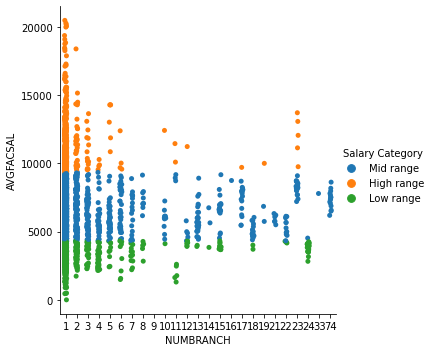

In [46]:
#looking at number of branches, college with 1 branch have the highest range of salaries and offer higher salaries

fig7 = sns.catplot(x="NUMBRANCH", y="AVGFACSAL", hue="Salary Category", data=df_corr)

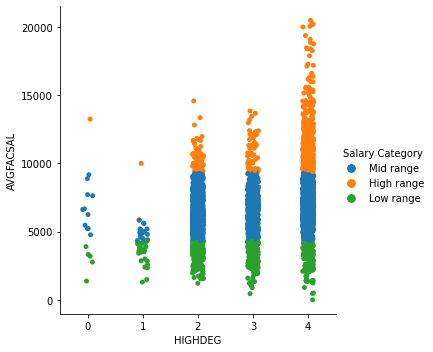

In [47]:
#looking at college that offer different types of highest degree awarded
#       0 Non-degree-granting
#       1 Certificate degree
#       2 Associate degree
#       3 Bachelor's degree
#       4 Graduate degree
#colleges that offer graduate degree have highest salaries and offer more high salaries


fig8 = sns.catplot(x="HIGHDEG", y="AVGFACSAL", hue="Salary Category", data=df_corr)

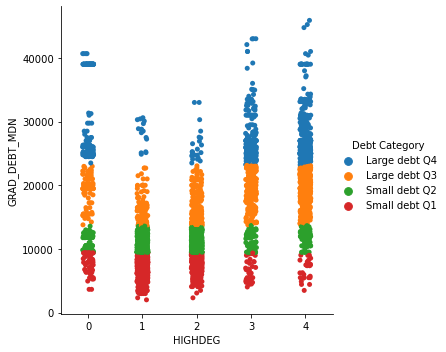

In [48]:
#looking at college that offer different types of highest degree awarded
#large debt is primarily for colleges that have graduate degree of bachelor's degree as the highest degree awarded 

fig9 = sns.catplot(x="HIGHDEG", y="GRAD_DEBT_MDN", hue="Debt Category", data=df_debt)

In [49]:
df_corr.to_csv(r'C:\Users\kirat\Documents\Career Foundry\Personal Project\02 Data\Prepared Data\data_correl.csv', index = False)

In [50]:
df_debt.to_csv(r'C:\Users\kirat\Documents\Career Foundry\Personal Project\02 Data\Prepared Data\data_debt.csv', index = False)

#### Key Question:
##### 1.	Do colleges with different predominant undergraduate degrees have different SAT/ACT scores?
    Colleges that offer different types of degrees do not have correlation with SAT scores.
    Correlation coeffiecient was found at r=0.09
    
##### 2.	Which universities are hard to get into?
    SAT scores can be used to distinguish colleges that are hard to get into.
    
##### 3.	Do different regions have different SAT/ACCT scores?
    Analysis was not done.
    
##### 4.	Do different regions have different average faculty salaries?
    Analysis was not done.
    
##### 5.	Which colleges are the best places to work for faculty in terms of salary?
    College that offer graduate degrees have the highest salaries.
    
##### 6.	Is there correlation between level of the institution and admission rate?
    Colleges that offer different types of degrees do not have correlation with admission rates.
    Correlation coeffiecient was found at r=-0.049.
    
##### 7.	How does average age of entry differ across the regions/types of colleges?
    Average age column has no non-null values, so was not used in the analysis
    
##### 8.	Is there a relationship between accreditation and admission rate?
    Analysis was not done.
    
##### 9.	Which college are no longer operational?
     Analysis was not done.
     
##### 10.	Analysis of debt after college.
    Student who graduate from colleges that offer higher degree are left with a higher debt.

#### Hypotheses:
Is there a difference in SAT scores between different types of colleges?
Is there a difference in faculty salary between different types of colleges?